In [1]:
# import yfinance
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# name = "GLD"
# ticker = yfinance.Ticker(name)
# df = ticker.history(interval="1d",start="2020-07-01",end="2021-03-01")
df=pd.read_csv("C:\\Users\Grant\Desktop\work_git\work\data\\1d\ZILUSDT_1d.csv", index_col="Time")

In [3]:
highest_swing = -1
lowest_swing = -1
for i in range(1,df.shape[0]-1):
  if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and (highest_swing == -1 or df['High'][i] > df['High'][highest_swing]):
    highest_swing = i
  if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and (lowest_swing == -1 or df['Low'][i] < df['Low'][lowest_swing]):
    lowest_swing = i

In [4]:
ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []
max_level = df['High'][highest_swing]
min_level = df['Low'][lowest_swing]
for ratio in ratios:
  if highest_swing > lowest_swing: # Uptrend
    levels.append(max_level - (max_level-min_level)*ratio)
  else: # Downtrend
    levels.append(min_level + (max_level-min_level)*ratio)

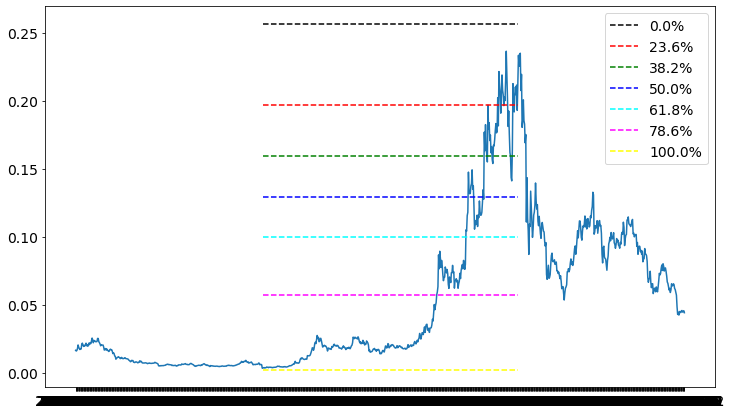

In [5]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plt.plot(df['Close'])
start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]
for i in range(len(levels)):
    plt.hlines(levels[i],start_date, end_date,label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")
plt.legend()
plt.show()